
انواع روش های نایو بیز را نام برده و فرمول اصلی ریاضیاتی نایو بیز را بنویسید

$$
p(y|x_{1}....x_{n})=(P(y)P(x_{1}...x_{n}|y)/P(x_{1}...x_{n})
$$


1.GaussianNB

$$
  P(x_{i}|y) = (1/√2πσ_{y}^2)exp(-(x_{i}-u_{i})^2/(2σ_{i}^2))
$$ 



2.MultinomialNB 
$$
  θ_{yi}=(N_{yi} + α)/(N_{y}+ αn)
$$ 


3.ComplementNB
$$
θ_{ci}=(a_{i}+\sum_{j}d_{ij})/(a+\sum_{j}\sum_{k}d_{jk})
$$


4.BernoulliNB 
$$
  P (x_{i}∣ y) = P (x_{i}= 1∣y)x_{i} + (1 − P (x_{i} = 1 ∣ y))(1 − x_{i})
$$ 



5.CategoricalNB
$$
  P (x_{i}=t∣y=c;α)=(N_{tic}+ α)/N_{c} + αn_{i}
$$ 

را توضیح دهید svm naivebase knn  اساس کار و روش انجام مدل های

1.KNN:KNN (K-Nearest Neighbor) is a simple supervised classification algorithm we can use to assign a class to new data point. It can be used for regression as well, KNN does not make any assumptions on the data distribution, hence it is non-parametric                                               

How to works:KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression)

2.naive bayes:Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem

How to Work:Step 1: Calculate the prior probability for given class labels. Step 2: Find Likelihood probability with each attribute for each class. Step 3: Put these value in Bayes Formula and calculate posterior probability. Step 4: See which class has a higher probability, given the input belongs to the higher probability class

3.SVM:Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The advantages of support vector machines are: Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples.                                 

How to Work:1.Create a new classifier. ...
2.Select how you want to classify your data. ...
3.Import your training data. ...
4.Define the tags for your SVM classifier. ...
5.Tag data to train your classifier. ...
6.Set your algorithm to SVM. ...
7.Test Your Classifier. ...
8.Integrate the topic classifier

در مدل ها چه راهکاری را پیشنهاد میدهید TP TN FP FNبرای پیدا کردن     

Accuracy:To estimate the accuracy of a test, we should calculate the proportion of true positive and true negative in all evaluated cases. Mathematically, this can be stated as:                                                
Accuracy=(TP+TN)/(TP+TN+FP+FN)                                                      
Sensitivity:To estimate it, we should calculate the proportion of true positive in classifier. Mathematically, this can be stated as:                                             
Sensitivity=(TP)/(TP+FN)                                                     
Specificity:(TN)/(TN+FP)                                               

-->In the Models we can use Confiusion matrix

روی داده های گل زنبق تمام روش هایی را که اموخته اید امتحان کنید

## Navie bayes

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [167]:
from sklearn import datasets

In [168]:
iris = datasets.load_iris()

In [169]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [170]:
df['species'] = iris.target

In [171]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


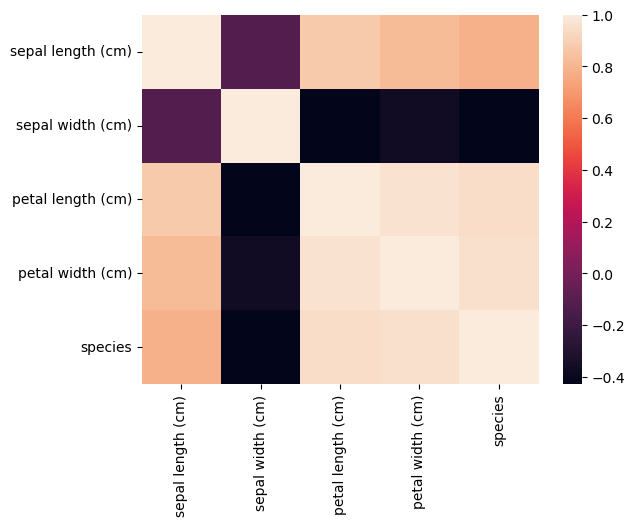

In [172]:
sns.heatmap(df.corr())
plt.show()

In [157]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

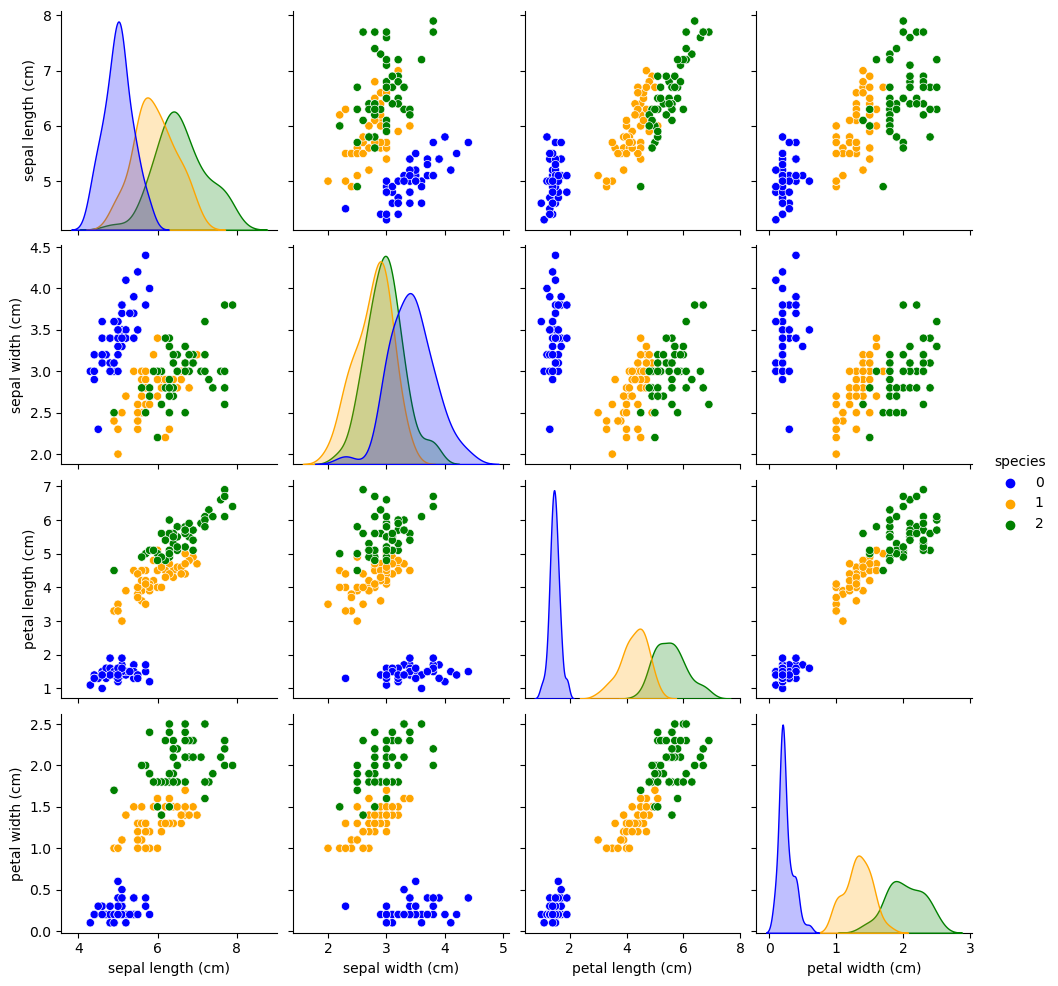

In [158]:
sns.pairplot(df,hue="species",palette=['blue','orange','green'])
plt.show()

In [173]:
X=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [174]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.19,random_state=85)

In [175]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [176]:
gaussian = make_pipeline(preprocessing.StandardScaler(),GaussianNB())
gaussian.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

In [177]:
Y_pred = gaussian.predict(X_test) 

In [179]:
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)

print('Confusion matrix \n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)


Confusion matrix 
 [[10  0  0]
 [ 0  7  1]
 [ 0  0 11]]
accuracy_Naive Bayes: 0.966


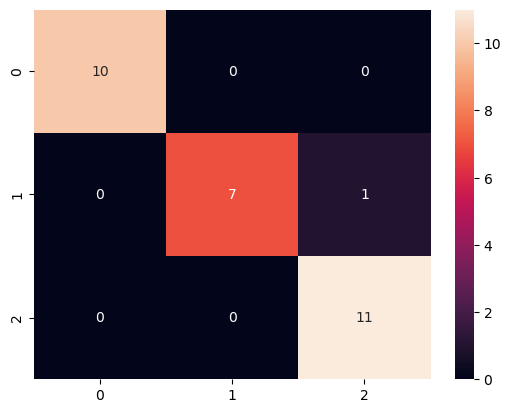

In [100]:

sns.heatmap(cm, annot=True) 
plt.show()

## SGD Classifier

In [180]:
from sklearn.linear_model import SGDClassifier 

In [181]:
from sklearn.model_selection import train_test_split
X_train7,X_test7,y_train7,y_test7=train_test_split(X,y,test_size=0.2,random_state=0)

In [182]:
sgd = make_pipeline(StandardScaler(),
                     SGDClassifier(penalty='l2', alpha=0.0001))

In [183]:
sgd.fit(X_train7, y_train7)
Y_pred7 = sgd.predict(X_test7) 

accuracy = accuracy_score(y_test7,Y_pred7)
print(accuracy)

0.9666666666666667


In [184]:
accuracy_nb=round(accuracy_score(y_test7,Y_pred7)* 100, 2)
acc_gaussian = round(sgd.score(X_train7, y_train7) * 100, 2)

cm = confusion_matrix(y_test7, Y_pred7)
accuracy = accuracy_score(y_test7,Y_pred7)

print('Confusion matrix \n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)

Confusion matrix 
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy_Naive Bayes: 0.967


## SVM

In [185]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.2,random_state=0)

In [186]:
from sklearn.svm import SVC

In [187]:
svc = make_pipeline(preprocessing.StandardScaler(),SVC())
svc.fit(X_train1, y_train1)
Y_pred1 = svc.predict(X_test1) 

accuracy = accuracy_score(y_test1,Y_pred1)
print(accuracy)

1.0


In [189]:

from sklearn.metrics import classification_report
print('SGD Classifier_SVM')
print(classification_report(y_test1, Y_pred1))
accuracy_nb=round(accuracy_score(y_test1,Y_pred1)* 100, 2)
acc_gaussian = round(svc.score(X_train1, y_train1) * 100, 2)

cm1 = confusion_matrix(y_test1, Y_pred1)
accuracy = accuracy_score(y_test1,Y_pred1)

print('Confusion matrix \n',cm1)
print('accuracy_SVM: %.3f' %accuracy)

SGD Classifier_SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion matrix 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy_SVM: 1.000


# Sample

SGD Classifier_SVM
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


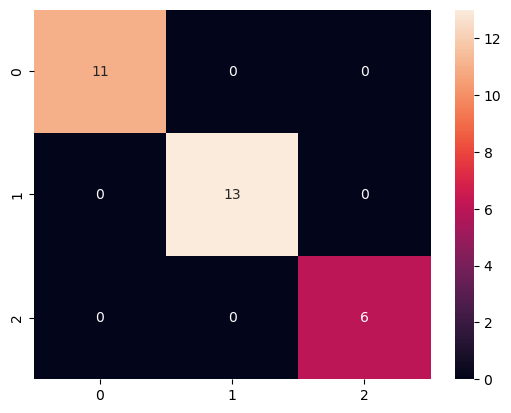

In [190]:
sns.heatmap(cm1, annot=True) 
plt.show()

<AxesSubplot: >

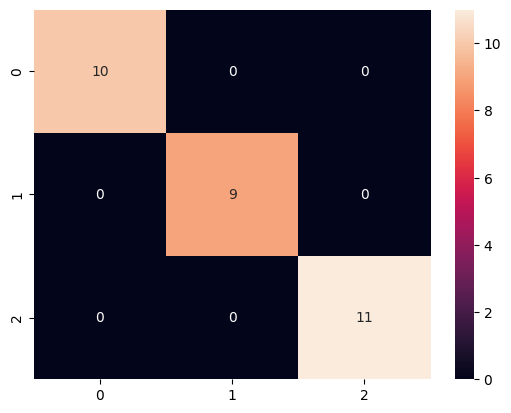

## Perceptron

In [191]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2=train_test_split(X,y,test_size=0.2,random_state=0)

In [192]:
from sklearn.linear_model import Perceptron 

In [193]:
Perceptron = make_pipeline(preprocessing.StandardScaler(),Perceptron())
Perceptron.fit(X_train2, y_train2)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('perceptron', Perceptron())])

In [194]:
Y_pred2 = Perceptron.predict(X_test2) 

In [195]:
from sklearn.metrics import classification_report

print(classification_report(y_test2, Y_pred2))
accuracy_nb=round(accuracy_score(y_test2,Y_pred2)* 100, 2)
acc_gaussian = round(Perceptron.score(X_train2, y_train2) * 100, 2)

cm = confusion_matrix(y_test2, Y_pred2)
accuracy = accuracy_score(y_test2,Y_pred2)

print('Confusion matrix \n',cm)
print('accuracy_Perceptron: %.3f' %accuracy)



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion matrix 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy_Perceptron: 1.000


## Sample

Perceptron
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


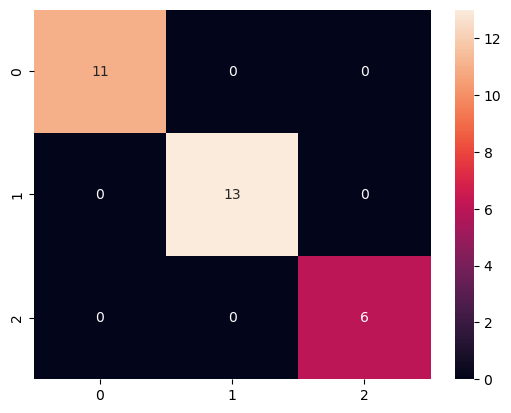

In [196]:

sns.heatmap(cm, annot=True) 
plt.show()

## Sample

<AxesSubplot: >

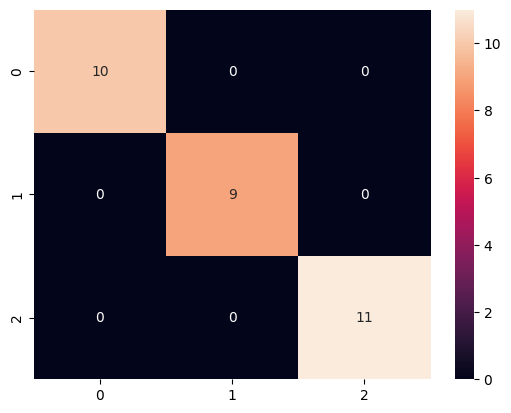

# Logistic Regression

In [196]:
from sklearn.model_selection import train_test_split
X_train3,X_test3,y_train3,y_test3=train_test_split(X,y,test_size=0.2)

In [197]:
from sklearn.linear_model import LogisticRegression

In [198]:
Logistic = make_pipeline(preprocessing.StandardScaler(),LogisticRegression())
Logistic.fit(X_train3, y_train3)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [199]:
Y_pred3 = Logistic.predict(X_test3) 

In [200]:
from sklearn.metrics import classification_report
print('Logistic Regression')
print(classification_report(y_test3, Y_pred3))
accuracy_nb=round(accuracy_score(y_test3,Y_pred3)* 100, 2)
acc_gaussian = round(Logistic.score(X_train3, y_train3) * 100, 2)

cm = confusion_matrix(y_test3, Y_pred3)
accuracy = accuracy_score(y_test3,Y_pred3)

print('Confusion matrix \n',cm)
print('accuracy_Logistic Regression: %.3f' %accuracy)

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion matrix 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy_Logistic Regression: 1.000


## Sample

Logistic Regression
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


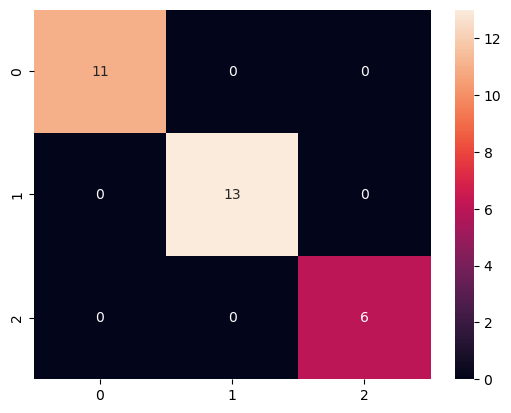

In [36]:
sns.heatmap(cm, annot=True) 
plt.show()

<AxesSubplot: >

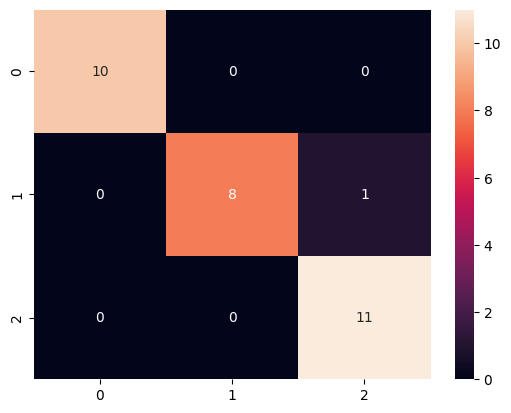

# KNN

In [201]:
from sklearn.model_selection import train_test_split
X_train4,X_test4,y_train4,y_test4=train_test_split(X,y,test_size=0.2,random_state=0)

In [202]:
from sklearn.neighbors import KNeighborsClassifier

In [203]:
knn = make_pipeline(preprocessing.StandardScaler(),KNeighborsClassifier(n_neighbors=4))
knn.fit(X_train4, y_train4)
Y_pred4 = knn.predict(X_test4) 

accuracy = accuracy_score(y_test4,Y_pred4)

In [204]:
from sklearn.metrics import classification_report
print('KNN')
print(classification_report(y_test4, Y_pred4))
accuracy_nb=round(accuracy_score(y_test4,Y_pred4)* 100, 2)
acc_gaussian = round(knn.score(X_train4, y_train4) * 100, 2)

cm = confusion_matrix(y_test4, Y_pred4)
accuracy = accuracy_score(y_test4,Y_pred4)

print('Confusion matrix \n',cm)
print('accuracy_Knn: %.3f' %accuracy)

KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion matrix 
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
accuracy_Knn: 0.967


## Sample

KNN
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


In [205]:
print(f' The accuracy: {accuracy}')

 The accuracy: 0.9666666666666667


In [206]:
X_train5,X_test5,y_train5,y_test5=train_test_split(X,y,test_size=0.8,random_state=95)

In [208]:
k=(1,22,4,12)
for i in k:
    knn = make_pipeline(preprocessing.StandardScaler(),KNeighborsClassifier(n_neighbors=i))
    knn.fit(X_train5, y_train5)
    Y_pred5 = knn.predict(X_test5) 

    accuracy = accuracy_score(y_test5,Y_pred5)
    from sklearn.metrics import classification_report
    print(f' The accuracy: {accuracy}')
    
    cm = confusion_matrix(y_test5, Y_pred5)


    print('Confusion matrix \n',cm)

 The accuracy: 0.9166666666666666
Confusion matrix 
 [[40  0  0]
 [ 0 35  8]
 [ 0  2 35]]
 The accuracy: 0.6416666666666667
Confusion matrix 
 [[40  0  0]
 [ 6  0 37]
 [ 0  0 37]]
 The accuracy: 0.8333333333333334
Confusion matrix 
 [[40  0  0]
 [ 0 33 10]
 [ 0 10 27]]
 The accuracy: 0.8
Confusion matrix 
 [[40  0  0]
 [ 0 29 14]
 [ 0 10 27]]


In [209]:
k=(1,22,4,12)
for i in k:
    knn = make_pipeline(preprocessing.StandardScaler(),KNeighborsClassifier(n_neighbors=i))
    knn.fit(X_train5, y_train5)
    Y_pred5 = knn.predict(X_test5) 

    accuracy = accuracy_score(y_test5,Y_pred5)
    from sklearn.metrics import classification_report
    print(classification_report(y_test5, Y_pred5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.81      0.88        43
           2       0.81      0.95      0.88        37

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        40
           1       0.00      0.00      0.00        43
           2       0.50      1.00      0.67        37

    accuracy                           0.64       120
   macro avg       0.46      0.67      0.53       120
weighted avg       0.44      0.64      0.52       120

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.77      0.77      0.77        43
           2       0.73      0.73      0.73        37

    accuracy        

/home/sara/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sara/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sara/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Sample

accuracy : 0.9416666666666668
accuracy : 0.7833333333333333
accuracy : 0.9583333333333334
accuracy : 0.6083333333333333
accuracy : 0.9500000000000001


[[40  0  0]
 [ 0 37  4]
 [ 0  3 36]]
[[40  0  0]
 [21 16  4]
 [ 0  1 38]]
[[40  0  0]
 [ 0 38  3]
 [ 0  2 37]]
[[39  1  0]
 [ 1 37  3]
 [ 0  5 34]]
[[40  0  0]
 [ 0 38  3]
 [ 0  3 36]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.93      0.90      0.91        41
   virginica       0.90      0.92      0.91        39

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

              precision    recall  f1-score   support

      setosa       0.66      1.00      0.79        40
  versicolor       0.94      0.39      0.55        41
   virginica       0.90      0.97      0.94        39

    accuracy                           0.78       120
   macro avg       0.83      0.79      0.76       120
weighted avg       0.83      0.78      0.76       120

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        40
  versicolor       0.95      0.93      0.94        41
   virginica       0.93      0.95      0.94        39

    accuracy        

بالایی دارند را پاک کرده و دوباره مدلی که این کار روی آن تاثیر گذار است را امتحان کنید corrolationحال ستونی که 

In [217]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


In [218]:
#Petal width has high correlation
df2=df.drop(['petal width (cm)'],axis=1)

## Modeled by LogisticRegression

In [219]:
X1=df2.iloc[:,0:-1].values
y1=df2.iloc[:,-1].values

In [220]:
from sklearn.model_selection import train_test_split
X_train6,X_test6,y_train6,y_test6=train_test_split(X1,y1,test_size=0.19,random_state=85)

In [221]:
gaussian1 = make_pipeline(preprocessing.StandardScaler(),LogisticRegression())
gaussian1.fit(X_train6, y_train6)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [222]:
Y_pred6 = gaussian1.predict(X_test6) 

In [223]:
accuracy_nb=round(accuracy_score(y_test6,Y_pred6)* 100, 2)
acc_gaussian = round(gaussian1.score(X_train6, y_train6) * 100, 2)

cm = confusion_matrix(y_test6, Y_pred6)
accuracy = accuracy_score(y_test6,Y_pred6)

print('Confusion matrix \n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)


Confusion matrix 
 [[ 9  1  0]
 [ 0  7  1]
 [ 0  1 10]]
accuracy_Naive Bayes: 0.897


با حذف ستونی که بیشترین کورلیشن را دارد دقت مدل کاهش پیدا میکند.

## Sample

accuracy : 0.9292929292929294


### try svm on below dataset and get accuracy more than 95 

In [240]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)


In [241]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [242]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['label'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [243]:
df.label.value_counts(normalize=True).round(3)

1    0.399
0    0.331
2    0.270
Name: label, dtype: float64

In [244]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
label                           0
dtype: int64

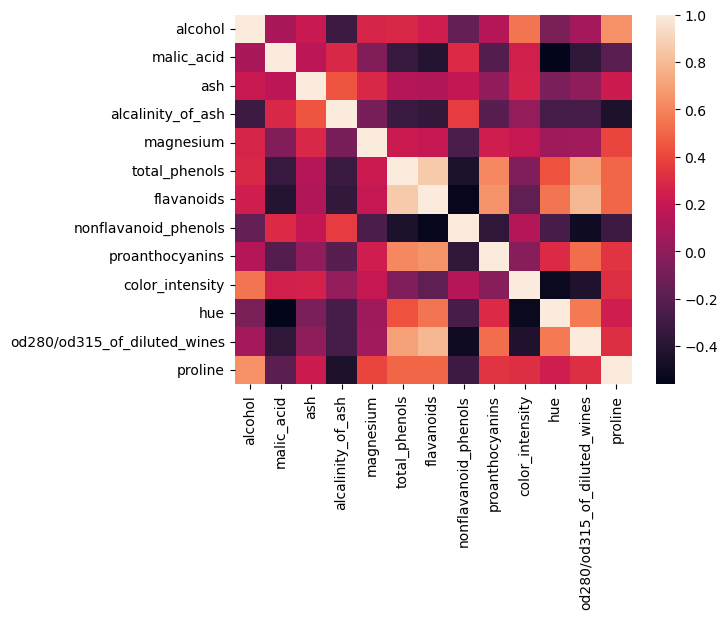

In [245]:
sns.heatmap(df.iloc[:,:-1].corr())
plt.show()

In [246]:
X = df.drop('label', axis=1).values
y = df.label.values

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [248]:
from sklearn.svm import SVC 

In [249]:
svc = make_pipeline(preprocessing.StandardScaler(),SVC())
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test) 

accuracy = accuracy_score(y_test,Y_pred)
print(accuracy)

0.9814814814814815


In [260]:
svc1 = make_pipeline(preprocessing.StandardScaler(),SVC(kernel='rbf',degree=3,gamma=0.3))
svc1.fit(X_train, y_train)
Y_pred = svc1.predict(X_test) 

accuracy = accuracy_score(y_test,Y_pred)
print(accuracy)

1.0


## Sample

0.9774928774928775

## Sample

0.9925925925925926